In [236]:
# unicode, regex, json for text digestion
import unicodedata
import re
import json
from wordcloud import WordCloud

import seaborn as sns
import matplotlib.pyplot as plt

# nltk: natural language toolkit -> tokenization, stopwords (more on this soon)
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

from prepare import *


# pandas dataframe manipulation, acquire script, time formatting
import pandas as pd
from time import strftime

# shh, down in front
import warnings
warnings.filterwarnings('ignore')

In [237]:
df = pd.read_json('data.json')

In [238]:
df = prep_repos(df)

In [239]:
df

repo    language  \
0                    google/googletest         C++   
1    projectdiscovery/nuclei-templates      Python   
2          digitalocean/nginxconfig.io  JavaScript   
3                      flutter/flutter        Dart   
4               PaddlePaddle/PaddleOCR      Python   
..                                 ...         ...   
104    cloudflare/cloudflare.github.io         CSS   
105              eleme/eleme.github.io         CSS   
106                didi/didi.github.io        HTML   
107         alibaba/alibaba.github.com         CSS   
108            google/google.github.io        HTML   

                                              original  \
0    # GoogleTest\n\n### Announcements\n\n#### Live...   
1    \n\n<h1 align="center">\nNuclei Templates\n</h...   
2    [![GitHub stars](https://img.shields.io/github...   
3    # [![Flutter logo][]][flutter.dev]\n\n[![Build...   
4    English | [简体中文](README_ch.md)\n\n<p align="ce...   
..                                                 ...   
104  cloudflare.github.io\n====================\n\n...   
105  # Team Blog\n\nRequirements to join this blog:...   
106                   # didi.github.io\ndidi website\n   
107                                                      
108                                                      

                                                 clean  \
0    googletest announcements live head googletest ...   
1    h1 aligncenter nuclei templates h1 h4 aligncen...   
2    github starshttpsimgshieldsiogithubstarsdigita...   
3    flutter logoflutterdev build status cirrusbuil...   
4    english readmechmd p aligncenter img srcdocpad...   
..                                                 ...   
104  cloudflaregithubio source code httpscloudflare...   
105  team blog requirements join blog 1 must develo...   
106                          didigithubio didi website   
107                                                      
108                                                      

                                               stemmed  \
0    googletest announc live head googletest follow...   
1    h1 aligncent nuclei templat h1 h4 aligncenterc...   
2    github starshttpsimgshieldsiogithubstarsdigita...   
3    flutter logoflutterdev build statu cirrusbuild...   
4    english readmechmd p aligncent img srcdocpaddl...   
..                                                 ...   
104  cloudflaregithubio sourc code httpscloudflareg...   
105  team blog requir join blog 1 must develop elem...   
106                           didigithubio didi websit   
107                                                      
108                                                      

                                            lemmatized  
0    googletest announcement live head googletest f...  
1    h1 aligncenter nucleus template h1 h4 aligncen...  
2    github starshttpsimgshieldsiogithubstarsdigita...  
3    flutter logoflutterdev build status cirrusbuil...  
4    english readmechmd p aligncenter img srcdocpad...  
..                                                 ...  
104  cloudflaregithubio source code httpscloudflare...  
105  team blog requirement join blog 1 must develop...  
106                          didigithubio didi website  
107                                                     
108                                                     

[109 rows x 6 columns]

In [240]:
df[df.language.isna()]

repo language  \
6             felipefialho/frontend-challenges     None   
8                        florinpop17/app-ideas     None   
21               ACM-Alexandria-SC/Internships     None   
36                      onceupon/Bash-Oneliner     None   
75                       datasciencemasters/go     None   
76  practical-tutorials/project-based-learning     None   
77        zhiwehu/Python-programming-exercises     None   
78               MunGell/awesome-for-beginners     None   
79                  appacademy/welcome-to-open     None   
84                              karan/Projects     None   
85                        sindresorhus/awesome     None   
87            codecrafters-io/build-your-own-x     None   

                                             original  \
6   <p align="center"><img src="https://user-image...   
8   ## :ledger: App Ideas Collection\n\n![App Idea...   
21  \n\n\n\n# Summer 2022 Tech Internships for Egy...   
36  # Bash-Oneliner\nI am glad that you are here! ...   
75  _created & maintained by [@clarecorthell](http...   
76  # Project Based Learning\n\n[![Gitter](https:/...   
77  # Python-programming-exercises\n\n100+ Python ...   
78  [![Doppler](assets/doppler.png)](https://www.d...   
79  # Welcome to a/A Open\n\n![](open-image.png)\n...   
84  Mega Project List\r\n========\r\n\r\nA list of...   
85  <div align="center">\n\t<a href="https://vshym...   
87  **[[Submit tutorial](https://github.com/danist...   

                                                clean  \
6   p aligncenterimg srchttpsuserimagesgithubuserc...   
8   ledger app ideas collection app ideas imageapp...   
21  summer 2022 tech internships egyptian students...   
36  bashoneliner glad working bioinformatics years...   
75  created maintained clarecorthellhttpbitlyclare...   
76  project based learning gitterhttpsbadgesgitter...   
77  pythonprogrammingexercises 100 python challeng...   
78  dopplerassetsdopplerpnghttpswwwdopplercomutmca...   
79  welcome aa open openimagepng tldr click learn ...   
84  mega project list list practical projects anyo...   
85  div aligncenter &#9; hrefhttpsvshymanskyygithu...   
87  submit tutorialhttpsgithubcomdanistefanovicbui...   

                                              stemmed  \
6   p aligncenterimg srchttpsuserimagesgithubuserc...   
8   ledger app idea collect app idea imageappideas...   
21  summer 2022 tech internship egyptian student c...   
36  bashonelin glad work bioinformat year ago amaz...   
75  creat maintain clarecorthellhttpbitlyclarecort...   
76  project base learn gitterhttpsbadgesgitterimpr...   
77  pythonprogrammingexercis 100 python challeng p...   
78  dopplerassetsdopplerpnghttpswwwdopplercomutmca...   
79  welcom aa open openimagepng tldr click learn c...   
84  mega project list list practic project anyon s...   
85  div aligncent &#9; hrefhttpsvshymanskyygithubi...   
87  submit tutorialhttpsgithubcomdanistefanovicbui...   

                                           lemmatized  
6   p aligncenterimg srchttpsuserimagesgithubuserc...  
8   ledger app idea collection app idea imageappid...  
21  summer 2022 tech internship egyptian student c...  
36  bashoneliner glad working bioinformatics year ...  
75  created maintained clarecorthellhttpbitlyclare...  
76  project based learning gitterhttpsbadgesgitter...  
77  pythonprogrammingexercises 100 python challeng...  
78  dopplerassetsdopplerpnghttpswwwdopplercomutmca...  
79  welcome aa open openimagepng tldr click learn ...  
84  mega project list list practical project anyon...  
85  div aligncenter &#9; hrefhttpsvshymanskyygithu...  
87  submit tutorialhttpsgithubcomdanistefanovicbui...

In [241]:
df['language_reduced'] = df.language.apply(lambda lang: lang if lang in ['JavaScript', 'HTML', 'Python'] else 'Other')

In [242]:
df.language.value_counts()

JavaScript          14
Python              13
HTML                10
TypeScript           9
CSS                  8
Rust                 6
Go                   5
Jupyter Notebook     4
SCSS                 3
Java                 3
Shell                2
Ruby                 2
C++                  2
C                    2
C#                   2
Dart                 2
Julia                1
Lua                  1
PHP                  1
Swift                1
PowerShell           1
V                    1
Vim script           1
Assembly             1
Vue                  1
SWIG                 1
Name: language, dtype: int64

In [243]:
df.language.value_counts(normalize=True)

JavaScript          0.144330
Python              0.134021
HTML                0.103093
TypeScript          0.092784
CSS                 0.082474
Rust                0.061856
Go                  0.051546
Jupyter Notebook    0.041237
SCSS                0.030928
Java                0.030928
Shell               0.020619
Ruby                0.020619
C++                 0.020619
C                   0.020619
C#                  0.020619
Dart                0.020619
Julia               0.010309
Lua                 0.010309
PHP                 0.010309
Swift               0.010309
PowerShell          0.010309
V                   0.010309
Vim script          0.010309
Assembly            0.010309
Vue                 0.010309
SWIG                0.010309
Name: language, dtype: float64

In [244]:
df.language_reduced.value_counts(normalize=True)

Other         0.660550
JavaScript    0.128440
Python        0.119266
HTML          0.091743
Name: language_reduced, dtype: float64

In [245]:
py_lan = df[df.language == 'Python']
py_words = py_lan.clean

In [246]:
py_words = ' '.join(df[df.language == 'Python'].clean)
java_words = ' '.join(df[df.language == 'JavaScript'].clean)
html_words = ' '.join(df[df.language == 'HTML'].clean)
types_words = ' '.join(df[df.language == 'TypeScript'].clean)
css_words = ' '.join(df[df.language == 'CSS'].clean)
all_words = ' '.join(df.clean)


In [247]:
py_words[:1000]

'h1 aligncenter nuclei templates h1 h4 aligncentercommunity curated list templates nuclei engine find security vulnerabilities applicationsh4 p aligncenter hrefhttpsgithubcomprojectdiscoverynucleitemplatesissuesimg srchttpsimgshieldsiobadgecontributionswelcomebrightgreensvgstyleflata hrefhttpsgithubcomprojectdiscoverynucleitemplatesreleasesimg srchttpsimgshieldsiogithubreleaseprojectdiscoverynucleitemplatesa hrefhttpstwittercompdnucleiimg srchttpsimgshieldsiotwitterfollowpdnucleisvglogotwittera hrefhttpsdiscordggprojectdiscoveryimg srchttpsimgshieldsiodiscord695645237418131507svglogodiscorda p p aligncenter hrefhttpsnucleiprojectdiscoveryiotemplatingguidedocumentationa hrefcontributionscontributionsa hrefdiscussiondiscussiona hrefcommunitycommunitya hrefhttpsnucleiprojectdiscoveryiofaqtemplatesfaqsa hrefhttpsdiscordggprojectdiscoveryjoin discorda p templates core nuclei scannerhttpsgithubcomprojectdiscoverynuclei powers actual scanning engine repository stores houses various templates 

In [248]:
java_words[:1000]

'github starshttpsimgshieldsiogithubstarsdigitaloceannginxconfigiosvghttpsgithubcomdigitaloceannginxconfigiostargazers github contributorshttpsimgshieldsiogithubcontributorsdigitaloceannginxconfigiosvgcolorbluehttpsgithubcomdigitaloceannginxconfigiographscontributors mit licensehttpsimgshieldsiogithublicensedigitaloceannginxconfigiosvgcolorbluehttpsgithubcomdigitaloceannginxconfigioblobmasterlicense br closed issueshttpsimgshieldsiogithubissuesclosedrawdigitaloceannginxconfigiosvgcolorbrightgreenhttpsgithubcomdigitaloceannginxconfigioissuesqis3aissueis3aclosed closed prhttpsimgshieldsiogithubissuesprclosedrawdigitaloceannginxconfigiosvgcolorbrightgreenhttpsgithubcomdigitaloceannginxconfigiopullsqis3apris3aclosed open issueshttpsimgshieldsiogithubissuesrawdigitaloceannginxconfigiosvghttpsgithubcomdigitaloceannginxconfigioissues open prhttpsimgshieldsiogithubissuesprrawdigitaloceannginxconfigiosvghttpsgithubcomdigitaloceannginxconfigiopulls nginxconfigsrcstaticbannerpnghttpsdoconginxconf

In [249]:
html_words[:1000]

'pyscript pyscript summary pyscript pythonic alternative scratch jsfiddle easy use programming frameworks goal making web friendly hackable place anyone author interesting interactive applications get started see gettingstartedgettingstartedmd examples see pyscript folderpyscriptjs longer version pyscript meta project aims combine multiple open technologies framework allows users create sophisticated browser applications python integrates seamlessly way dom works browser allows users add python logic way feels natural web python developers try pyscript try pyscript import appropriate pyscript files html page html link relstylesheet hrefhttpspyscriptnetalphapyscriptcss script defer srchttpspyscriptnetalphapyscriptjsscript use pyscript components html page pyscript currently implements following elements pyscript used define python code executable within web page element rendered page used add logic pyrepl creates repl component rendered page code editor allows users write executable cod

In [323]:
types_words[:1000]

"p aligncenter img width300 srchttpsrawgithubusercontentcomsupabasesupabasemasterwebstaticsupabaselightroundedcornerbackgroundsvg p supabase supabasehttpssupabasecom open source firebase alternative ' building features firebase using enterprisegrade open source tools x hosted postgres database docshttpssupabasecomdocsguidesdatabase x authentication authorization docshttpssupabasecomdocsguidesauth x autogenerated apis x rest docshttpssupabasecomdocsguidesapirestapi x realtime subscriptions docshttpssupabasecomdocsguidesapirealtimeapi x graphql beta docshttpssupabasecomdocsguidesapigraphqlapi x functions x database functions docshttpssupabasecomdocsguidesdatabasefunctions x edge functions docshttpssupabasecomdocsguidesfunctions x file storage docshttpssupabasecomdocsguidesstorage x dashboard supabase dashboardhttpsrawgithubusercontentcomsupabasesupabasemasterappswwwpublicimagesgithubsupabasedashboardpng documentation full documentation visit supabasecomdocshttpssupabasecomdocs see contri

In [251]:
css_words[:1000]

'50 projects 50 days htmlcss javascript main repository projects course course linkhttpswwwudemycomcourse50projects50days course info websitehttps50projects50dayscom project live demo 01 expanding cardshttpsgithubcombradtraversy50projects50daystreemasterexpandingcards live demohttps50projects50dayscomprojectsexpandingcards 02 progress stepshttpsgithubcombradtraversy50projects50daystreemasterprogresssteps live demohttps50projects50dayscomprojectsprogresssteps 03 rotating navigation animationhttpsgithubcombradtraversy50projects50daystreemasterrotatingnavanimation live demohttps50projects50dayscomprojectsrotatingnavigationanimation 04 hidden search widgethttpsgithubcombradtraversy50projects50daystreemasterhiddensearch live demohttps50projects50dayscomprojectshiddensearchwidget 05 blurry loadinghttpsgithubcombradtraversy50projects50daystreemasterblurryloading live demohttps50projects50dayscomprojectsblurryloading 06 scroll animationhttpsgithubcombradtraversy50projects50daystreemasterscroll

In [252]:
all_words[:1000]

"googletest announcements live head googletest follows abseil live head philosophyhttpsabseilioaboutphilosophyupgradesupport recommend updating latest commit main branch often possiblehttpsgithubcomabseilabseilcppblobmasterfaqmdwhatisliveatheadandhowdoidoit documentation updates documentation live github pages httpsgooglegithubiogoogletest recommend browsing documentation github pages rather directly repository release 1110 release 1110httpsgithubcomgooglegoogletestreleasestagrelease1110 available coming soon planning take dependency abseilhttpsgithubcomabseilabseilcpp documentation improvements planned welcome googletest google ' c test framework repository merger formerly separate googletest googlemock projects closely related makes sense maintain release together getting started see googletest user ' guidehttpsgooglegithubiogoogletest documentation recommend starting googletest primerhttpsgooglegithubiogoogletestprimerhtml information building googletest found googletestreadmemdgoog

In [253]:
py_freq = pd.Series(py_words.split()).value_counts()
java_freq = pd.Series(java_words.split()).value_counts()
html_freq = pd.Series(html_words.split()).value_counts()
types_freq = pd.Series(types_words.split()).value_counts()
css_freq = pd.Series(css_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()


In [254]:
py_freq

yes                                                        1734
unknown                                                     912
apikey                                                      595
details                                                     433
bdetails                                                    410
                                                           ... 
nathttpswwwnginxcomresourcesglossarylayer4loadbalancing       1
7layer7                                                       1
4layer4                                                       1
certificateshttpsenwikipediaorgwikix509                       1
publicapis                                                    1
Length: 8842, dtype: int64

In [255]:
java_freq

b                79
terrad           44
'                43
github           38
terra            35
                 ..
completely        1
typescript        1
multilanguage     1
tons              1
file2             1
Length: 2311, dtype: int64

In [256]:
html_freq

sample           24
nginx            17
application      14
database         14
pyscript         13
                 ..
macos             1
windows           1
prerequisites     1
containerized     1
didi              1
Length: 573, dtype: int64

In [257]:
types_freq

'               59
td              45
aligncentera    45
width100px      45
altbr           45
                ..
checkboxes       1
inputs           1
common           1
drag             1
details          1
Length: 2066, dtype: int64

In [258]:
css_freq

live          53
license       19
open          16
source        15
github        13
              ..
distribute     1
sublicense     1
andor          1
sell           1
need           1
Length: 802, dtype: int64

In [259]:
all_freq

yes                                                 1764
'                                                   1137
unknown                                              913
&#9;                                                 739
apikey                                               595
                                                    ... 
zstdhttpsgithubcomfacebookzstd                         1
softfloathttpwwwjhauserusarithmeticsoftfloathtml       1
precisely                                              1
emulate                                                1
didi                                                   1
Length: 22171, dtype: int64

In [260]:
word_counts = pd.concat([py_freq, java_freq, html_freq, types_freq, css_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['python', 'java', 'html', 'typescript', 'css', 'all']

In [261]:
word_counts

python  java  html  \
yes                                                 1734     2     0   
unknown                                              912     0     0   
apikey                                               595     0     0   
details                                              433     1     3   
bdetails                                             410     0     0   
...                                                  ...   ...   ...   
kvmunittestshttpswwwlinuxkvmorgpagekvmunittests        0     0     0   
zstdhttpsgithubcomfacebookzstd                         0     0     0   
softfloathttpwwwjhauserusarithmeticsoftfloathtml       0     0     0   
precisely                                              0     0     0   
emulate                                                0     0     0   

                                                  typescript  css   all  
yes                                                        0    0  1764  
unknown                                                    0    0   913  
apikey                                                     0    0   595  
details                                                    1    0   459  
bdetails                                                   0    0   410  
...                                                      ...  ...   ...  
kvmunittestshttpswwwlinuxkvmorgpagekvmunittests            0    0     1  
zstdhttpsgithubcomfacebookzstd                             0    0     1  
softfloathttpwwwjhauserusarithmeticsoftfloathtml           0    0     1  
precisely                                                  0    0     1  
emulate                                                    0    0     1  

[22171 rows x 6 columns]

In [262]:
word_counts.sort_values('python', ascending=False).head(25)

python  java  html  typescript  css   all
yes                  1734     2     0           0    0  1764
unknown               912     0     0           0    0   913
apikey                595     0     0           0    0   595
details               433     1     3           1    0   459
bdetails              410     0     0           0    0   410
api                   347     8     0          17    4   427
data                  341    15     0          13    7   560
'                     220    43     8          59    7  1137
open                  184    27    11          19   16   407
1                     174    27     2          11    2   359
summary               164     0     1           0    0   167
summarybrb            161     0     0           0    0   161
oauth                 149     0     0           2    0   151
released              118     0     1           1    0   128
paper                 111     0     0           1    0   118
government            107     0     0           0    0   108
information           100    12     1          13    3   173
summarysummarybrb      97     0     0           0    0    97
p                      88    32     0          33    2   230
language               83     3     1           4    2   184
model                  81     0     0           1    0   134
get                    74    13     5           8    3   178
text                   73     0     0           3    1   152
pretrained             65     0     0           0    0    66
pretraining            65     0     0           0    0    66

In [263]:
word_counts.sort_values('java', ascending=False).head(25)

python  java  html  typescript  css   all
b                9    79     0           0    0   129
terrad           0    44     0           0    0    44
'              220    43     8          59    7  1137
github          12    38    13           7   13   165
terra            0    35     0           0    0    35
n                2    32     0           0    1    81
p               88    32     0          33    2   230
run             10    31     8          10    6   206
bash             6    27     0           3    2   513
code            57    27     9          39    6   379
open           184    27    11          19   16   407
1              174    27     2          11    2   359
use             32    26    13          13    7   242
create          22    26     2           4    1   182
build           12    26     0          19    4   355
npm              1    25     0           3    1    38
serverless       0    25     0           0    0    34
install         18    25    11           8   12   175
using           40    22     3          21    6   277
start            4    21     1           9    1    97
node             0    21     0           3    0    40
pull             7    20     0           5    3    59
learn            5    19     1           4    1    98
license         21    19     2          10   19   120
add             12    19     4           5    4   131

In [264]:
word_counts.sort_values('html', ascending=False).head(25)

python  java  html  typescript  css   all
sample            2     2    24           1    0    32
nginx             3    11    17           0    0    34
application       4    14    14           4    0    95
database         26     6    14           9    0    88
use              32    26    13          13    7   242
github           12    38    13           7   13   165
pyscript          0     0    13           0    0    13
docker           27     5    12           5    0    93
open            184    27    11          19   16   407
compose           1     0    11           0    0    12
install          18    25    11           8   12   175
source           22    14    10          17   15   189
react             1     1    10           4    0    99
samples           3     0    10           0    0    20
microsoft        26     3    10           9    0    73
code             57    27     9          39    6   379
proxy             7     1     8           0    0    24
run              10    31     8          10    6   206
'               220    43     8          59    7  1137
page             10     4     8           2    7    53
rails             0     0     8           0    0    19
girls             0     0     8           0    0     8
backend           1     0     7           2    0    27
jekyll            0     0     7           0   11    21
repository       14    18     7          10    7   100

In [265]:
word_counts.sort_values('typescript', ascending=False).head(25)

python  java  html  typescript  css   all
'                220    43     8          59    7  1137
width100px         0     0     0          45    0    45
td                26     0     0          45    0    81
altbr              0     0     0          45    0    45
aligncentera      24     0     0          45    1    73
targetblank        1     7     0          43    0    53
relnoopener        0     0     0          40    0    40
tr                 8     0     0          40    0    63
code              57    27     9          39    6   379
tda                0     0     0          36    0    36
p                 88    32     0          33    2   230
br                65    12     0          32    0   397
kibana             1     0     1          25    0    27
titlecodeatd       0     0     0          24    0    24
using             40    22     3          21    6   277
img               58    12     0          21    1   135
tdtd               0     0     0          19    0    19
build             12    26     0          19    4   355
projects           8     8     3          19    6   128
open             184    27    11          19   16   407
community         15    10     0          18    1    69
source            22    14    10          17   15   189
version           11    16     2          17    2   108
api              347     8     0          17    4   427
development       10     8     1          16    1   114

In [266]:
word_counts.sort_values('css', ascending=False).head(25)

python  java  html  typescript  css   all
live              13     1     0           2   53    79
license           21    19     2          10   19   120
open             184    27    11          19   16   407
source            22    14    10          17   15   189
github            12    38    13           7   13   165
software          10     5     1           1   13   101
install           18    25    11           8   12   175
jekyll             0     0     7           0   11    21
adobe              0     0     0           0    8     9
file              31    15     2           6    8   224
copyright          2     2     0           2    8    21
content           20     4     1           3    8    63
use               32    26    13          13    7   242
foundation         2     0     0           0    7    11
repo               1     7     3           5    7    56
'                220    43     8          59    7  1137
data             341    15     0          13    7   560
repository        14    18     7          10    7   100
project           13    14     6           6    7   141
page              10     4     8           2    7    53
organization       0     5     2           2    6    26
code              57    27     9          39    6   379
want               7     9     2           4    6    76
requests          12     1     0           3    6    39
projects           8     8     3          19    6   128

In [267]:
# set up some basic matplotlib style parameters
plt.rc('figure', figsize=(17, 10))
plt.style.use('seaborn-darkgrid')

Text(0.5, 1.0, 'Top 25 Most Frequent Overall Words')

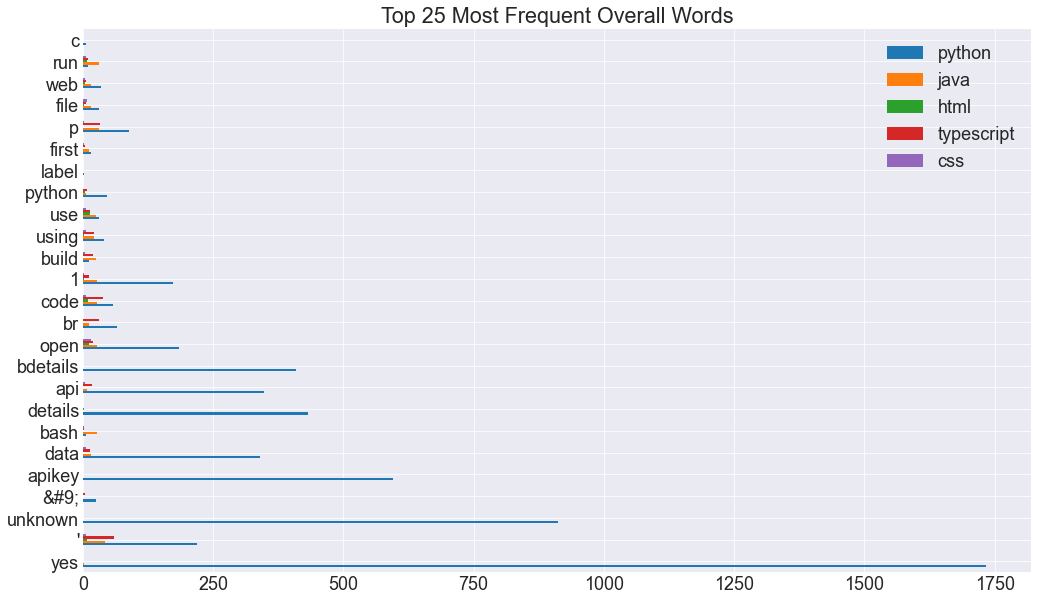

In [268]:
plt.rc('font', size=18)
word_counts.sort_values('all', ascending=False).head(25)[['python', 'java', 'html', 'typescript', 'css']].plot.barh()
plt.title('Top 25 Most Frequent Overall Words')

## Python words

(-0.5, 799.5, 599.5, -0.5)

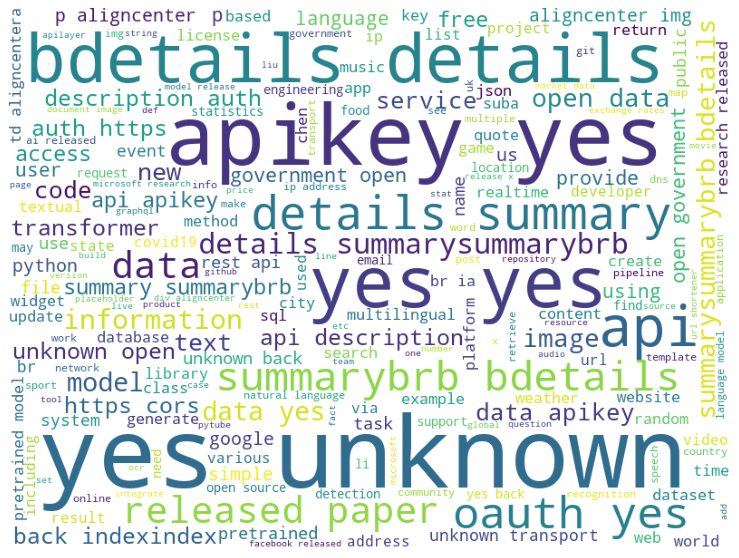

In [269]:
img = WordCloud(background_color='white', width=800, height=600).generate(py_words)
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

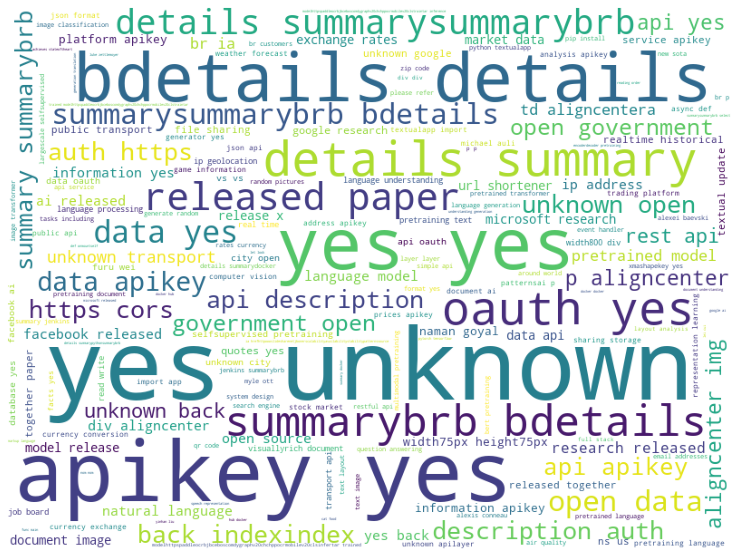

In [371]:
img = WordCloud(background_color='white', width=800, height=600, collocation_threshold=3).generate(py_words)
plt.imshow(img)
plt.axis('off')

In [370]:
py_bigrams = (pd.Series((nltk.bigrams(py_words.split()))).astype('string'))
py_bigrams.value_counts()

('yes', 'unknown')                                      834
('apikey', 'yes')                                       571
('yes', 'yes')                                          396
('bdetails', 'details')                                 357
('details', 'summary')                                  159
                                                       ... 
('rmv', 'api')                                            1
('germanyhttpsopendatarmvdesitestarthtml', 'rmv')         1
('hessen', 'germanyhttpsopendatarmvdesitestarthtml')      1
('transport', 'transport')                                1
('2022', 'publicapis')                                    1
Length: 19792, dtype: Int64

## JavaScript Words

(-0.5, 799.5, 599.5, -0.5)

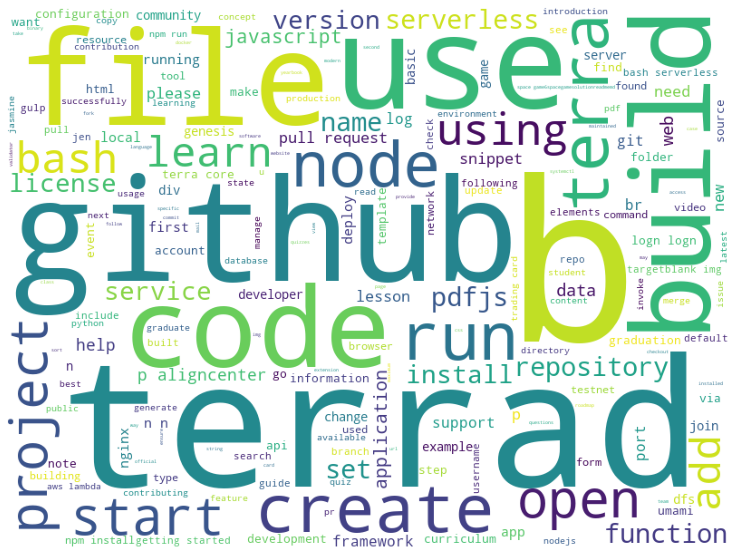

In [271]:
img = WordCloud(background_color='white', width=800, height=600).generate(java_words)
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

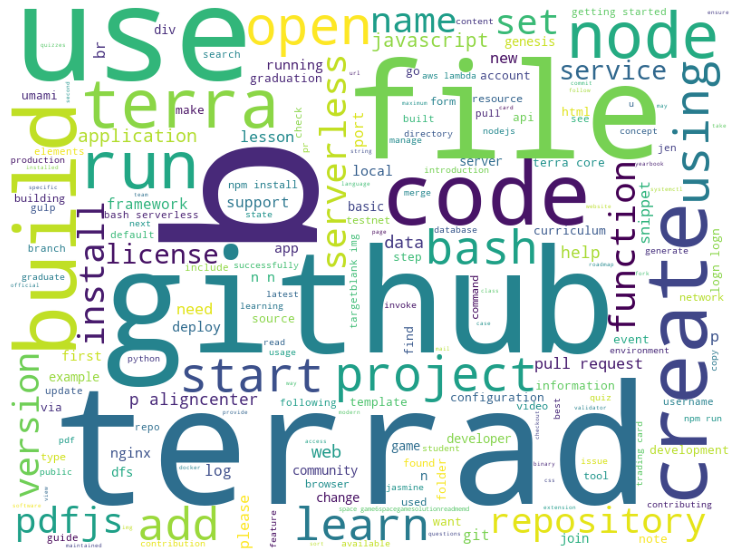

In [369]:
img = WordCloud(background_color='white', width=800, height=600).generate(java_words)
plt.imshow(img)
plt.axis('off')

In [368]:
java_bigrams = (pd.Series((nltk.bigrams(java_words.split()))).astype('string'))
java_bigrams.value_counts()

('p', 'aligncenter')        14
('pull', 'request')         13
('n', 'n')                  10
('terra', 'core')            9
('logn', 'logn')             9
                            ..
('generate', 'built')        1
('run', 'npm')               1
('featured', 'projects')     1
('install', '3')             1
('create', 'pull')           1
Length: 4735, dtype: Int64

## HTML Words

(-0.5, 799.5, 599.5, -0.5)

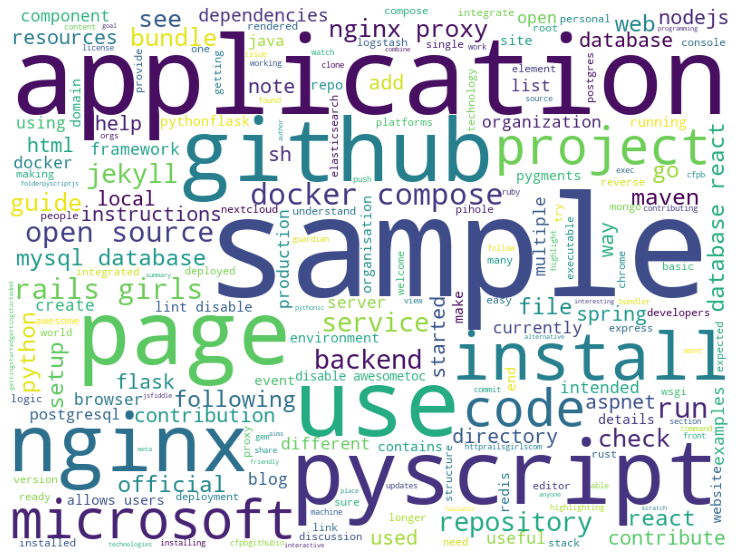

In [367]:
img = WordCloud(background_color='white', width=800, height=600).generate(html_words)
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

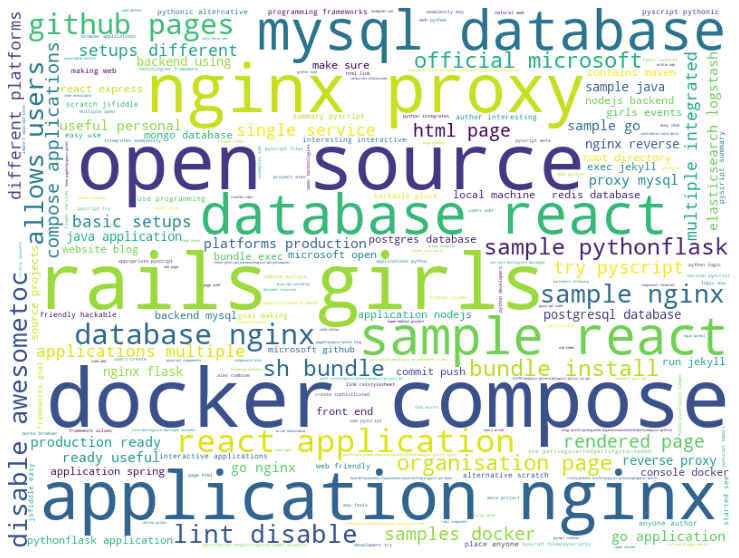

In [366]:
img = WordCloud(background_color='white', width=800, height=600, collocation_threshold=3).generate(html_words)
plt.imshow(img)
plt.axis('off')

In [365]:
html_bigrams = (pd.Series((nltk.bigrams(html_words.split()))).astype('string'))
html_bigrams.value_counts()

('docker', 'compose')                                                                                    9
('open', 'source')                                                                                       8
('rails', 'girls')                                                                                       8
('application', 'nginx')                                                                                 6
('nginx', 'proxy')                                                                                       6
                                                                                                        ..
('files', 'microsoftrepotemplateshttpsgithubcommicrosoftrepotemplates')                                  1
('microsoftrepotemplateshttpsgithubcommicrosoftrepotemplates', 'code')                                   1
('code', 'conducthttpsopensourcemicrosoftcomcodeofconduct')                                              1
('conducthttpsopensourcemicrosoftcomc

## TypeScript Words

(-0.5, 799.5, 599.5, -0.5)

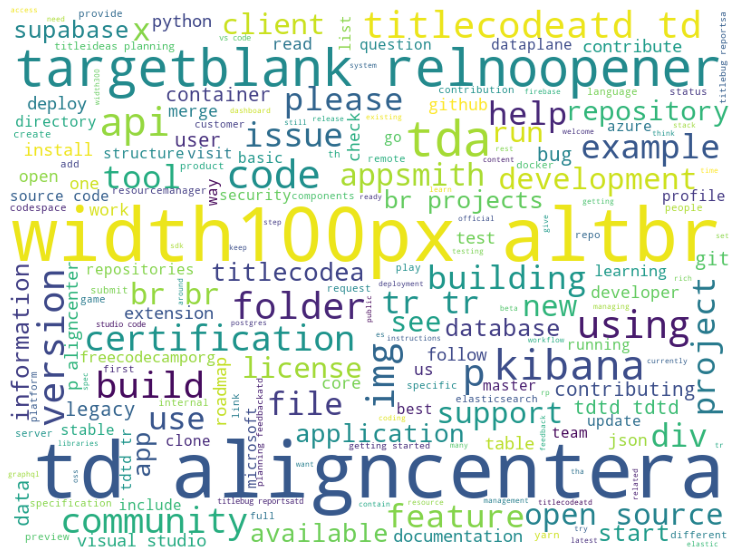

In [275]:
img = WordCloud(background_color='white', width=800, height=600).generate(types_words)
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

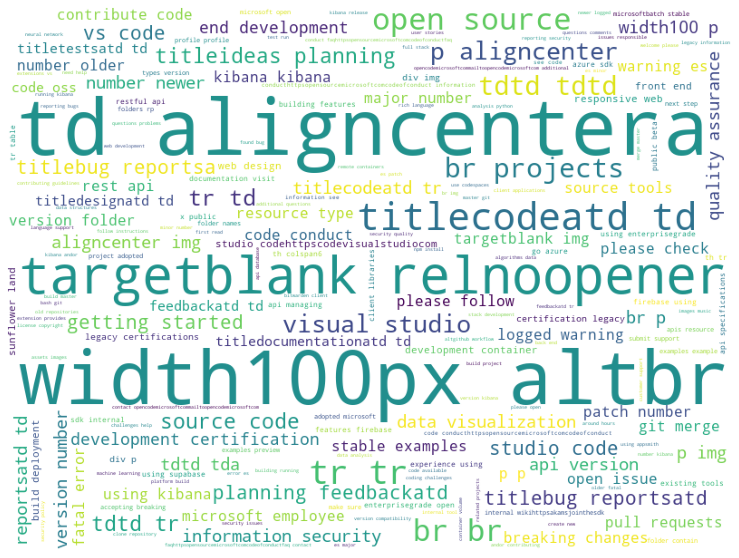

In [364]:
img = WordCloud(background_color='white', width=800, height=600, collocation_threshold=3).generate(types_words)
plt.imshow(img)
plt.axis('off')

In [363]:
types_bigrams = (pd.Series((nltk.bigrams(types_words.split()))).astype('string'))
types_bigrams.value_counts()

('width100px', 'altbr')           45
('td', 'aligncentera')            45
('targetblank', 'relnoopener')    40
('titlecodeatd', 'td')            20
('tr', 'tr')                      15
                                  ..
('work', 'supported')              1
('supported', 'communitya')        1
('communitya', 'sup')              1
('sup', 'p')                       1
('filelicense', 'details')         1
Length: 3723, dtype: Int64

## CSS Words

(-0.5, 799.5, 599.5, -0.5)

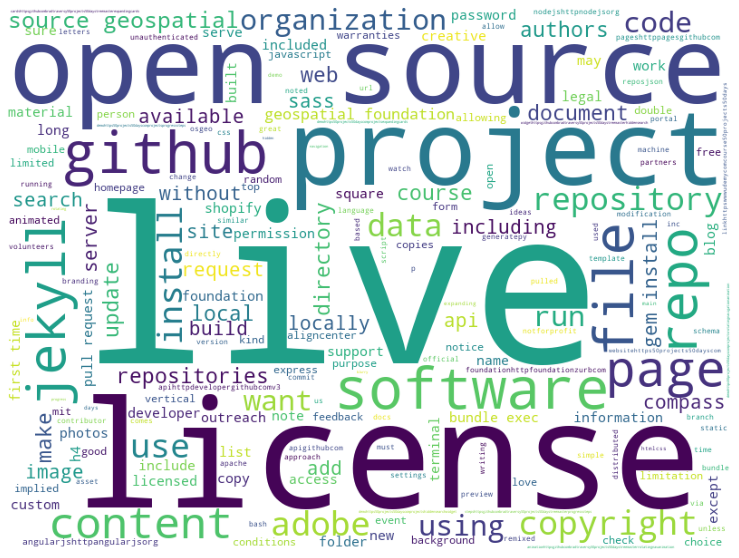

In [277]:
img = WordCloud(background_color='white', width=800, height=600).generate(css_words)
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

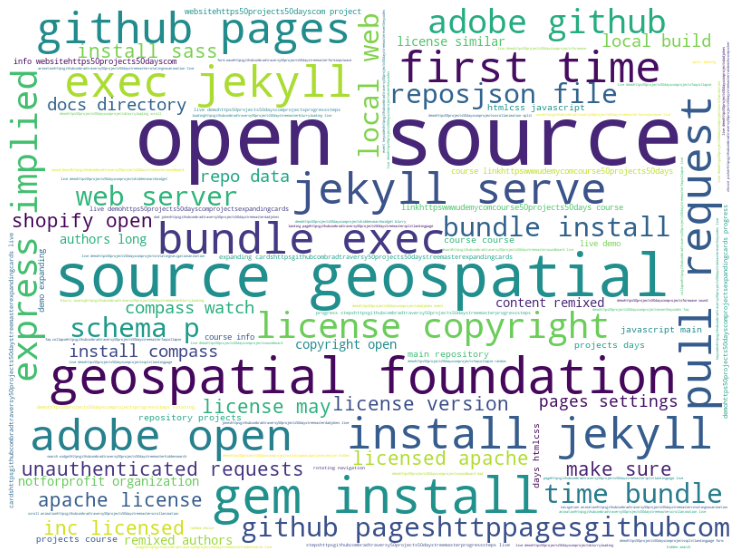

In [362]:
img = WordCloud(background_color='white', width=800, height=600, collocation_threshold=3).generate(css_words)
plt.imshow(img)
plt.axis('off')

In [361]:
css_bigrams = (pd.Series((nltk.bigrams(css_words.split()))).astype('string'))
css_bigrams.value_counts()

('open', 'source')              13
('source', 'geospatial')         6
('geospatial', 'foundation')     4
('gem', 'install')               4
('bundle', 'exec')               3
                                ..
('organization', 'donated')      1
('donated', 'via')               1
('via', 'pull')                  1
('pull', 'request')              1
('need', 'install')              1
Length: 1244, dtype: Int64

#### Check the length of the readme

In [279]:
df['message_length'] = df.clean.apply(len)
df['word_count'] = df.clean.apply(str.split).apply(len)
df.head()

repo    language  \
0                  google/googletest         C++   
1  projectdiscovery/nuclei-templates      Python   
2        digitalocean/nginxconfig.io  JavaScript   
3                    flutter/flutter        Dart   
4             PaddlePaddle/PaddleOCR      Python   

                                            original  \
0  # GoogleTest\n\n### Announcements\n\n#### Live...   
1  \n\n<h1 align="center">\nNuclei Templates\n</h...   
2  [![GitHub stars](https://img.shields.io/github...   
3  # [![Flutter logo][]][flutter.dev]\n\n[![Build...   
4  English | [简体中文](README_ch.md)\n\n<p align="ce...   

                                               clean  \
0  googletest announcements live head googletest ...   
1  h1 aligncenter nuclei templates h1 h4 aligncen...   
2  github starshttpsimgshieldsiogithubstarsdigita...   
3  flutter logoflutterdev build status cirrusbuil...   
4  english readmechmd p aligncenter img srcdocpad...   

                                             stemmed  \
0  googletest announc live head googletest follow...   
1  h1 aligncent nuclei templat h1 h4 aligncenterc...   
2  github starshttpsimgshieldsiogithubstarsdigita...   
3  flutter logoflutterdev build statu cirrusbuild...   
4  english readmechmd p aligncent img srcdocpaddl...   

                                          lemmatized language_reduced  \
0  googletest announcement live head googletest f...            Other   
1  h1 aligncenter nucleus template h1 h4 aligncen...           Python   
2  github starshttpsimgshieldsiogithubstarsdigita...       JavaScript   
3  flutter logoflutterdev build status cirrusbuil...            Other   
4  english readmechmd p aligncenter img srcdocpad...           Python   

   message_length  word_count  
0            3478         341  
1            3483         288  
2            4429         327  
3            4546         398  
4           10335         684

In [280]:
df.message_length.mean()

8699.59633027523

In [281]:
df[['message_length', 'word_count']][df.language == 'Python']

message_length  word_count
1             3483         288
4            10335         684
10           43400        3986
11             404          33
17           18999        1582
25            1300         108
52             326          33
53            2607         276
57           30509        3234
59              10           1
60           10952        1271
86           33389        1856
88          138754       13726

In [282]:
df[['message_length', 'word_count']][df.language == 'JavaScript']

message_length  word_count
2             4429         327
13           11376        1158
22            3872         354
23            5040         435
27            5143         483
29            9357         845
33            2364          63
69            1885         201
70            1325         144
82            4330         297
83            8381         589
93            2502         229
97             148          15
99            1038         139

In [283]:
df[['message_length', 'word_count']][df.language == 'HTML']

message_length  word_count
26             1497         159
38             5351         386
71             1894         200
91             1294         155
92               42           5
96              592          76
100            1382         116
103               0           0
106              25           3
108               0           0

In [284]:
df[['message_length', 'word_count']][df.language == 'TypeScript']

message_length  word_count
5             9226         703
12            3147         361
19            2554         281
39            2324         216
41           18374         989
43            5031         398
54            5762         309
73           15379         736
81            2908         251

In [285]:
df[['message_length', 'word_count']][df.language == 'CSS']

message_length  word_count
68             8295         406
89             2093         220
94             1729         207
98             1817         203
102            2177         242
104             162          15
105             163          24
107               0           0

## Lemmatized

In [286]:
py_words_l = ' '.join(df[df.language == 'Python'].lemmatized)
java_words_l = ' '.join(df[df.language == 'JavaScript'].lemmatized)
html_words_l = ' '.join(df[df.language == 'HTML'].lemmatized)
types_words_l = ' '.join(df[df.language == 'TypeScript'].lemmatized)
css_words_l = ' '.join(df[df.language == 'CSS'].lemmatized)
all_words_l = ' '.join(df.lemmatized)

In [287]:
py_words_l[:1000]

'h1 aligncenter nucleus template h1 h4 aligncentercommunity curated list template nucleus engine find security vulnerability applicationsh4 p aligncenter hrefhttpsgithubcomprojectdiscoverynucleitemplatesissuesimg srchttpsimgshieldsiobadgecontributionswelcomebrightgreensvgstyleflata hrefhttpsgithubcomprojectdiscoverynucleitemplatesreleasesimg srchttpsimgshieldsiogithubreleaseprojectdiscoverynucleitemplatesa hrefhttpstwittercompdnucleiimg srchttpsimgshieldsiotwitterfollowpdnucleisvglogotwittera hrefhttpsdiscordggprojectdiscoveryimg srchttpsimgshieldsiodiscord695645237418131507svglogodiscorda p p aligncenter hrefhttpsnucleiprojectdiscoveryiotemplatingguidedocumentationa hrefcontributionscontributionsa hrefdiscussiondiscussiona hrefcommunitycommunitya hrefhttpsnucleiprojectdiscoveryiofaqtemplatesfaqsa hrefhttpsdiscordggprojectdiscoveryjoin discorda p template core nucleus scannerhttpsgithubcomprojectdiscoverynuclei power actual scanning engine repository store house various template scanne

In [288]:
java_words_l[:1000]

'github starshttpsimgshieldsiogithubstarsdigitaloceannginxconfigiosvghttpsgithubcomdigitaloceannginxconfigiostargazers github contributorshttpsimgshieldsiogithubcontributorsdigitaloceannginxconfigiosvgcolorbluehttpsgithubcomdigitaloceannginxconfigiographscontributors mit licensehttpsimgshieldsiogithublicensedigitaloceannginxconfigiosvgcolorbluehttpsgithubcomdigitaloceannginxconfigioblobmasterlicense br closed issueshttpsimgshieldsiogithubissuesclosedrawdigitaloceannginxconfigiosvgcolorbrightgreenhttpsgithubcomdigitaloceannginxconfigioissuesqis3aissueis3aclosed closed prhttpsimgshieldsiogithubissuesprclosedrawdigitaloceannginxconfigiosvgcolorbrightgreenhttpsgithubcomdigitaloceannginxconfigiopullsqis3apris3aclosed open issueshttpsimgshieldsiogithubissuesrawdigitaloceannginxconfigiosvghttpsgithubcomdigitaloceannginxconfigioissues open prhttpsimgshieldsiogithubissuesprrawdigitaloceannginxconfigiosvghttpsgithubcomdigitaloceannginxconfigiopulls nginxconfigsrcstaticbannerpnghttpsdoconginxconf

In [289]:
html_words_l[:1000]

'pyscript pyscript summary pyscript pythonic alternative scratch jsfiddle easy use programming framework goal making web friendly hackable place anyone author interesting interactive application get started see gettingstartedgettingstartedmd example see pyscript folderpyscriptjs longer version pyscript meta project aim combine multiple open technology framework allows user create sophisticated browser application python integrates seamlessly way dom work browser allows user add python logic way feel natural web python developer try pyscript try pyscript import appropriate pyscript file html page html link relstylesheet hrefhttpspyscriptnetalphapyscriptcss script defer srchttpspyscriptnetalphapyscriptjsscript use pyscript component html page pyscript currently implement following element pyscript used define python code executable within web page element rendered page used add logic pyrepl creates repl component rendered page code editor allows user write executable code check pyscriptj

In [290]:
types_words_l[:1000]

"p aligncenter img width300 srchttpsrawgithubusercontentcomsupabasesupabasemasterwebstaticsupabaselightroundedcornerbackgroundsvg p supabase supabasehttpssupabasecom open source firebase alternative ' building feature firebase using enterprisegrade open source tool x hosted postgres database docshttpssupabasecomdocsguidesdatabase x authentication authorization docshttpssupabasecomdocsguidesauth x autogenerated apis x rest docshttpssupabasecomdocsguidesapirestapi x realtime subscription docshttpssupabasecomdocsguidesapirealtimeapi x graphql beta docshttpssupabasecomdocsguidesapigraphqlapi x function x database function docshttpssupabasecomdocsguidesdatabasefunctions x edge function docshttpssupabasecomdocsguidesfunctions x file storage docshttpssupabasecomdocsguidesstorage x dashboard supabase dashboardhttpsrawgithubusercontentcomsupabasesupabasemasterappswwwpublicimagesgithubsupabasedashboardpng documentation full documentation visit supabasecomdocshttpssupabasecomdocs see contribute v

In [291]:
css_words_l[:1000]

'50 project 50 day htmlcss javascript main repository project course course linkhttpswwwudemycomcourse50projects50days course info websitehttps50projects50dayscom project live demo 01 expanding cardshttpsgithubcombradtraversy50projects50daystreemasterexpandingcards live demohttps50projects50dayscomprojectsexpandingcards 02 progress stepshttpsgithubcombradtraversy50projects50daystreemasterprogresssteps live demohttps50projects50dayscomprojectsprogresssteps 03 rotating navigation animationhttpsgithubcombradtraversy50projects50daystreemasterrotatingnavanimation live demohttps50projects50dayscomprojectsrotatingnavigationanimation 04 hidden search widgethttpsgithubcombradtraversy50projects50daystreemasterhiddensearch live demohttps50projects50dayscomprojectshiddensearchwidget 05 blurry loadinghttpsgithubcombradtraversy50projects50daystreemasterblurryloading live demohttps50projects50dayscomprojectsblurryloading 06 scroll animationhttpsgithubcombradtraversy50projects50daystreemasterscrollani

In [292]:
all_words_l[:1000]

"googletest announcement live head googletest follows abseil live head philosophyhttpsabseilioaboutphilosophyupgradesupport recommend updating latest commit main branch often possiblehttpsgithubcomabseilabseilcppblobmasterfaqmdwhatisliveatheadandhowdoidoit documentation update documentation live github page httpsgooglegithubiogoogletest recommend browsing documentation github page rather directly repository release 1110 release 1110httpsgithubcomgooglegoogletestreleasestagrelease1110 available coming soon planning take dependency abseilhttpsgithubcomabseilabseilcpp documentation improvement planned welcome googletest google ' c test framework repository merger formerly separate googletest googlemock project closely related make sense maintain release together getting started see googletest user ' guidehttpsgooglegithubiogoogletest documentation recommend starting googletest primerhttpsgooglegithubiogoogletestprimerhtml information building googletest found googletestreadmemdgoogletestr

In [293]:
py_freq_l = pd.Series(py_words_l.split()).value_counts()
java_freq_l = pd.Series(java_words_l.split()).value_counts()
html_freq_l = pd.Series(html_words_l.split()).value_counts()
types_freq_l = pd.Series(types_words_l.split()).value_counts()
css_freq_l = pd.Series(css_words_l.split()).value_counts()
all_freq_l = pd.Series(all_words_l.split()).value_counts()


In [294]:
py_freq_l

yes                                      1734
unknown                                   912
apikey                                    595
detail                                    434
bdetails                                  410
                                         ... 
intinputhow                                 1
returnsum                                   1
whileamountofnumbers1amountofnumbers0       1
azzip                                       1
publicapis                                  1
Length: 8460, dtype: int64

In [295]:
java_freq_l

b                79
terrad           44
'                43
github           38
terra            35
                 ..
typescript        1
multilanguage     1
ton               1
approachable      1
file2             1
Length: 2194, dtype: int64

In [296]:
html_freq_l

sample                                34
application                           20
nginx                                 17
database                              14
use                                   13
                                      ..
dockerhttpswwwdockercomgetstarted      1
linux                                  1
desktophttpswwwdockercomgetstarted     1
macos                                  1
didi                                   1
Length: 548, dtype: int64

In [297]:
types_freq_l

'               59
altbr           45
td              45
aligncentera    45
width100px      45
                ..
dynamodb         1
redshift         1
firestore        1
mysql            1
detail           1
Length: 1983, dtype: int64

In [298]:
css_freq_l

live           53
license        20
open           16
source         16
project        13
               ..
deal            1
restriction     1
right           1
modify          1
need            1
Length: 775, dtype: int64

In [299]:
all_freq_l

yes                  1764
'                    1137
unknown               913
&#9;                  739
apikey                595
                     ... 
nasmtests               1
nasmtestsforcejit       1
expecttests             1
jitpagingtests          1
didi                    1
Length: 21269, dtype: int64

In [300]:
word_counts_l = pd.concat([py_freq_l, java_freq_l, html_freq_l, types_freq_l, css_freq_l, all_freq_l], axis=1).fillna(0).astype(int)
word_counts_l.columns = ['python', 'java', 'html', 'typescript', 'css', 'all']

In [301]:
word_counts_l

python  java  html  typescript  css   all
yes                  1734     2     0           0    0  1764
unknown               912     0     0           0    0   913
apikey                595     0     0           0    0   595
detail                434     1     3           1    0   469
bdetails              410     0     0           0    0   410
...                   ...   ...   ...         ...  ...   ...
kvmunittest             0     0     0           0    0     1
nasmtests               0     0     0           0    0     1
nasmtestsforcejit       0     0     0           0    0     1
expecttests             0     0     0           0    0     1
jitpagingtests          0     0     0           0    0     1

[21269 rows x 6 columns]

In [302]:
word_counts_l.sort_values('python', ascending=False).head(25)

python  java  html  typescript  css   all
yes                  1734     2     0           0    0  1764
unknown               912     0     0           0    0   913
apikey                595     0     0           0    0   595
detail                434     1     3           1    0   469
bdetails              410     0     0           0    0   410
api                   347     8     0          17    4   427
data                  341    15     0          13    7   561
'                     220    43     8          59    7  1137
open                  184    27    11          19   16   407
1                     174    27     2          11    2   360
summary               165     0     1           0    0   169
summarybrb            161     0     0           0    0   161
oauth                 149     0     0           2    0   151
model                 137     0     0           1    0   217
released              118     0     1           1    0   128
paper                 112     0     0           1    0   137
government            108     0     0           0    0   109
language              108     5     1           5    2   232
information           100    12     1          13    3   173
summarysummarybrb      97     0     0           0    0    97
image                  90     4     0           4    4   177
p                      89    32     0          33    2   236
http                   82     3     0           0    0   110
text                   77     0     0           3    1   156
get                    75    13     5           8    3   181

In [319]:
word_counts_l.sort_values('java', ascending=False).head(25)

python  java  html  typescript  css   all
b                9    79     0           0    0   130
terrad           0    44     0           0    0    44
'              220    43     8          59    7  1137
github          12    38    13           7   13   165
terra            0    35     0           0    0    35
n               22    32     0           0    1   101
p               89    32     0          33    2   236
run             11    31     8          11    6   222
file            43    29     5          14   12   337
bash             6    27     0           3    2   513
open           184    27    11          19   16   407
1              174    27     2          11    2   360
code            67    27     9          39    6   389
use             32    26    13          13    7   242
build           12    26     0          19    4   363
create          22    26     2           4    1   182
serverless       0    25     0           0    0    34
npm              1    25     0           3    1    38
install         18    25    11           8   12   175
node             0    23     0           3    0    42
using           40    22     3          21    6   277
start            4    22     1           9    1   100
project         21    22     9          25   13   269
repository      15    20     7          16   12   119
license         21    20     2          11   20   125

In [320]:
word_counts_l.sort_values('html', ascending=False).head(25)

python  java  html  typescript  css   all
sample            5     2    34           1    0    52
application      15    16    20          10    0   163
nginx             3    11    17           0    0    34
database         27     6    14           9    0    98
page             20     5    13           3   10    81
github           12    38    13           7   13   165
pyscript          0     0    13           0    0    13
use              32    26    13          13    7   242
docker           27     5    12           5    0    93
compose           1     0    11           0    0    12
open            184    27    11          19   16   407
install          18    25    11           8   12   175
microsoft        26     3    10           9    0    73
source           32    14    10          17   16   205
react             1     1    10           4    0    99
code             67    27     9          39    6   389
project          21    22     9          25   13   269
run              11    31     8          11    6   222
proxy            10     1     8           0    0    27
girl              0     0     8           0    0     8
rail              0     0     8           0    0    19
'               220    43     8          59    7  1137
backend           1     0     7           2    0    27
service          59    17     7           2    0   164
jekyll            0     0     7           0   11    21

In [305]:
word_counts_l.sort_values('typescript', ascending=False).head(25)

python  java  html  typescript  css   all
'                 220    43     8          59    7  1137
width100px          0     0     0          45    0    45
altbr               0     0     0          45    0    45
td                 26     0     0          45    0    81
aligncentera       24     0     0          45    1    73
targetblank         1     7     0          43    0    53
tr                  8     0     0          40    0    63
relnoopener         0     0     0          40    0    40
code               67    27     9          39    6   389
tda                 0     0     0          36    0    36
p                  89    32     0          33    2   236
br                 65    12     0          32    0   397
project            21    22     9          25   13   269
kibana              1     0     1          25    0    27
titlecodeatd        0     0     0          24    0    24
img                58    12     0          21    1   135
using              40    22     3          21    6   277
folder              3     9     1          20    3    66
version            12    17     2          20    2   127
tdtd                0     0     0          19    0    19
community          15    10     0          19    1    73
build              12    26     0          19    4   363
open              184    27    11          19   16   407
certification       0     0     0          18    0    18
api               347     8     0          17    4   427

In [306]:
word_counts_l.sort_values('css', ascending=False).head(25)

python  java  html  typescript  css   all
live              13     1     0           2   53    79
license           21    20     2          11   20   125
open             184    27    11          19   16   407
source            32    14    10          17   16   205
github            12    38    13           7   13   165
project           21    22     9          25   13   269
software          10     5     1           1   13   101
file              43    29     5          14   12   337
install           18    25    11           8   12   175
repository        15    20     7          16   12   119
jekyll             0     0     7           0   11    21
page              20     5    13           3   10    81
copyright          2     2     0           2    8    22
adobe              0     0     0           0    8     9
content           20     6     2           4    8    80
use               32    26    13          13    7   242
request           20    15     0           8    7    86
foundation         2     0     0           0    7    11
'                220    43     8          59    7  1137
repo               1     7     3           5    7    56
data             341    15     0          13    7   561
code              67    27     9          39    6   389
run               11    31     8          11    6   222
organization       2     5     3           2    6    33
using             40    22     3          21    6   277

In [307]:
# set up some basic matplotlib style parameters
plt.rc('figure', figsize=(17, 10))
plt.style.use('seaborn-darkgrid')

Text(0.5, 1.0, 'Top 25 Most Frequent Overall lemmatized Words')

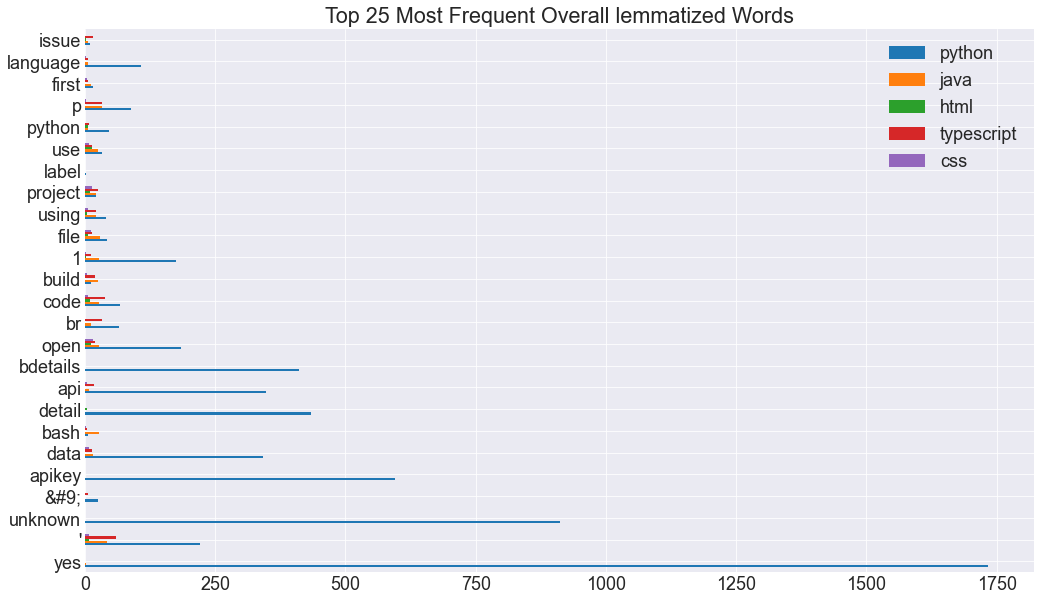

In [308]:
plt.rc('font', size=18)
word_counts_l.sort_values('all', ascending=False).head(25)[['python', 'java', 'html', 'typescript', 'css']].plot.barh()
plt.title('Top 25 Most Frequent Overall lemmatized Words')

## Python words

(-0.5, 799.5, 599.5, -0.5)

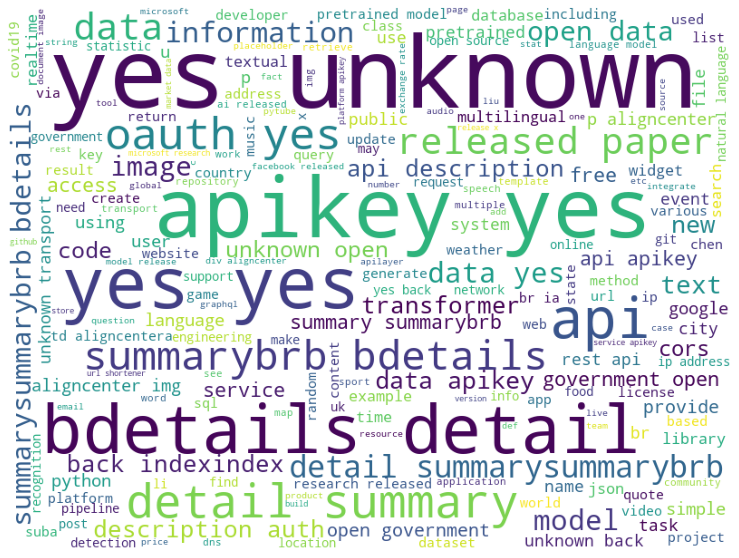

In [352]:
img = WordCloud(background_color='white', width=800, height=600).generate(py_words_l)
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

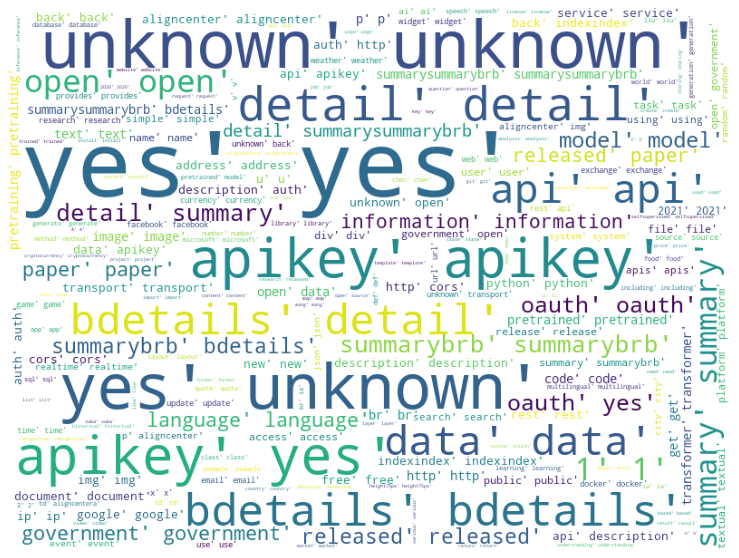

In [310]:
img = WordCloud(background_color='white', width=800, height=600, collocation_threshold=3).generate(py_words_l)
plt.imshow(img)
plt.axis('off')

In [351]:
py_bigrams_l = (pd.Series((nltk.bigrams(py_words_l.split()))).astype('string'))
py_bigrams_l.value_counts()

('yes', 'unknown')                                                     834
('apikey', 'yes')                                                      571
('yes', 'yes')                                                         396
('bdetails', 'detail')                                                 357
('detail', 'summary')                                                  159
                                                                      ... 
('gasdiesel', 'price')                                                   1
('realtime', 'gasdiesel')                                                1
('german', 'realtime')                                                   1
('tankerkoenighttpscreativecommonstankerkoenigdeswagger', 'german')      1
('2022', 'publicapis')                                                   1
Length: 19639, dtype: Int64

## JavaScript Words

(-0.5, 799.5, 599.5, -0.5)

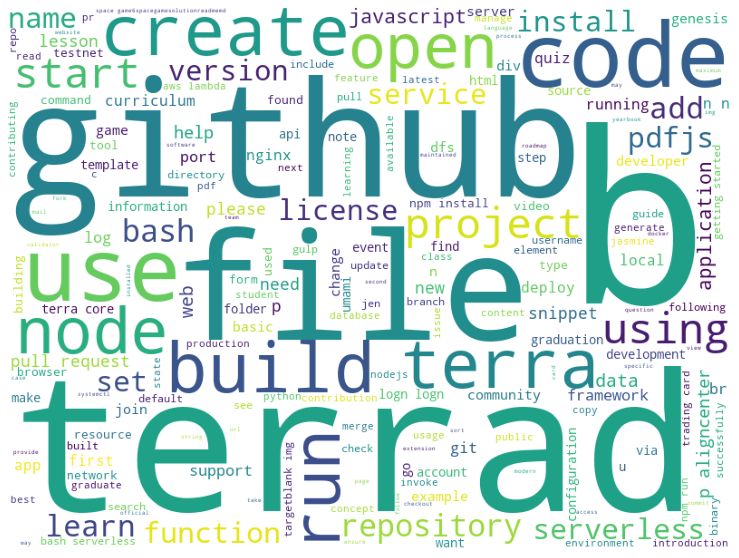

In [353]:
img = WordCloud(background_color='white', width=800, height=600).generate(java_words_l)
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

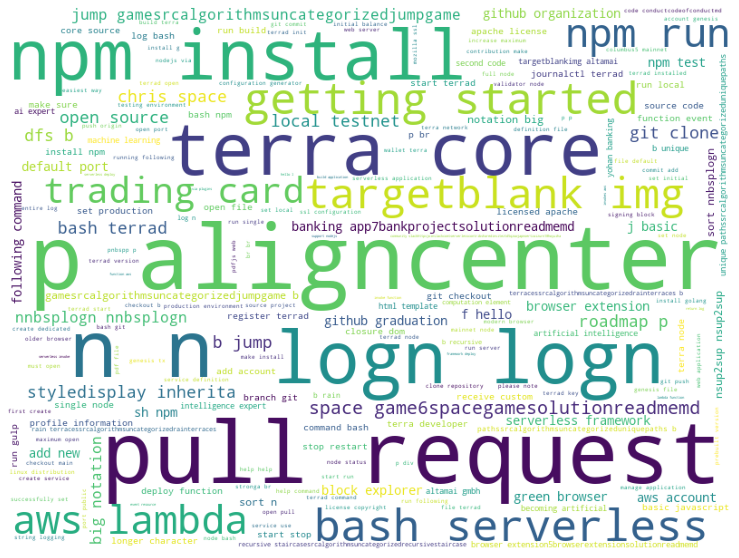

In [344]:
img = WordCloud(background_color='white', width=800, height=600, collocation_threshold=3).generate(java_words_l)
plt.imshow(img)
plt.axis('off')

In [354]:
java_bigrams_l = (pd.Series((nltk.bigrams(java_words_l.split()))).astype('string'))
java_bigrams_l.value_counts()

('p', 'aligncenter')              14
('pull', 'request')               13
('n', 'n')                        10
('logn', 'logn')                   9
('terra', 'core')                  9
                                  ..
('site', 'httplocalhost8000')      1
('httplocalhost8000', 'watch')     1
('raw', 'source')                  1
('featured', 'project')            1
('create', 'pull')                 1
Length: 4711, dtype: Int64

## HTML Words

(-0.5, 799.5, 599.5, -0.5)

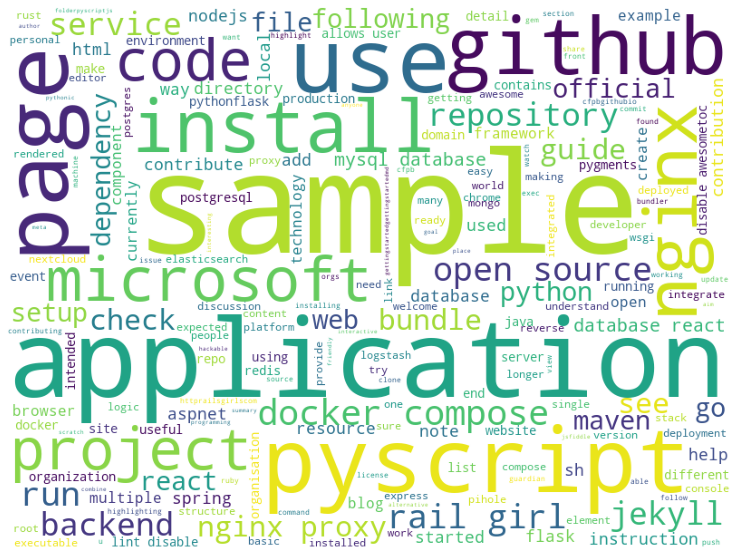

In [313]:
img = WordCloud(background_color='white', width=800, height=600).generate(html_words_l)
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

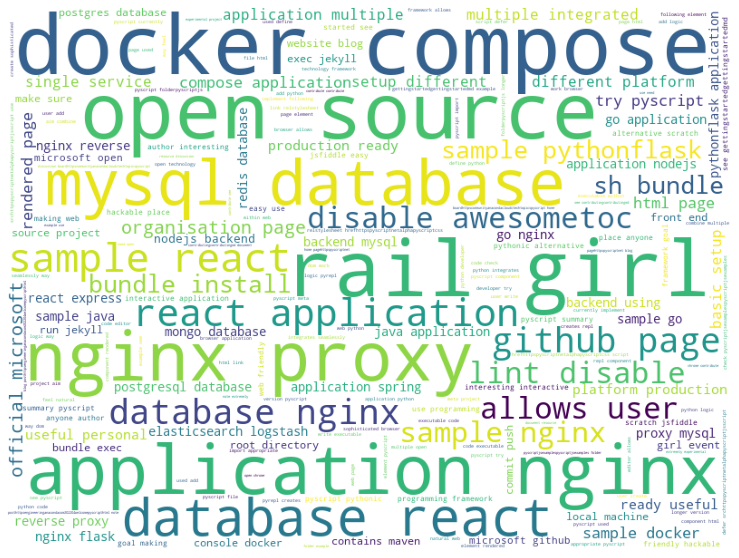

In [355]:
img = WordCloud(background_color='white', width=800, height=600, collocation_threshold=3).generate(html_words_l)
plt.imshow(img)
plt.axis('off')

In [356]:
html_bigrams_l = (pd.Series((nltk.bigrams(html_words_l.split()))).astype('string'))
html_bigrams_l.value_counts()

('docker', 'compose')                                                                                    9
('open', 'source')                                                                                       8
('rail', 'girl')                                                                                         8
('application', 'nginx')                                                                                 6
('nginx', 'proxy')                                                                                       6
                                                                                                        ..
('file', 'microsoftrepotemplateshttpsgithubcommicrosoftrepotemplates')                                   1
('microsoftrepotemplateshttpsgithubcommicrosoftrepotemplates', 'code')                                   1
('code', 'conducthttpsopensourcemicrosoftcomcodeofconduct')                                              1
('conducthttpsopensourcemicrosoftcomc

## TypeScript Words

(-0.5, 799.5, 599.5, -0.5)

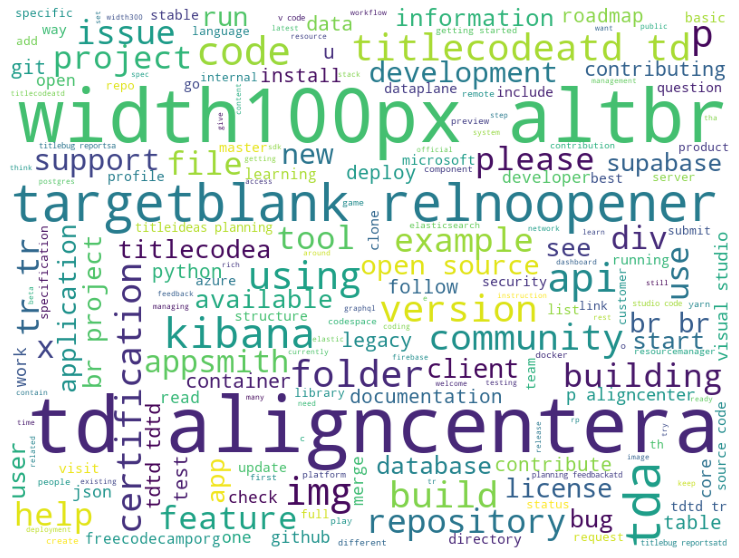

In [315]:
img = WordCloud(background_color='white', width=800, height=600).generate(types_words_l)
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

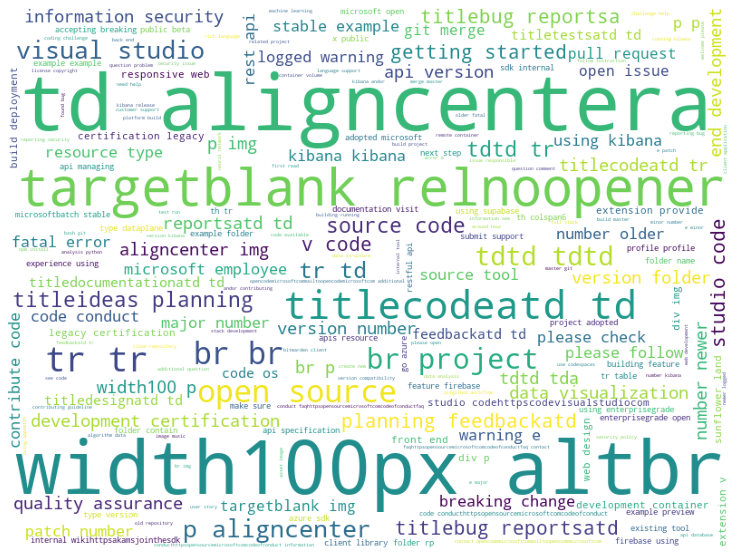

In [357]:
img = WordCloud(background_color='white', width=800, height=600, collocation_threshold=3).generate(types_words_l)
plt.imshow(img)
plt.axis('off')

In [358]:
types_bigrams_l = (pd.Series((nltk.bigrams(types_words_l.split()))).astype('string'))
types_bigrams_l.value_counts()

('td', 'aligncentera')            45
('width100px', 'altbr')           45
('targetblank', 'relnoopener')    40
('titlecodeatd', 'td')            20
('tr', 'tr')                      15
                                  ..
('communitya', 'sup')              1
('sup', 'p')                       1
('p', 'supspecial')                1
('supspecial', 'thanks')           1
('filelicense', 'detail')          1
Length: 3704, dtype: Int64

## CSS Words

(-0.5, 799.5, 599.5, -0.5)

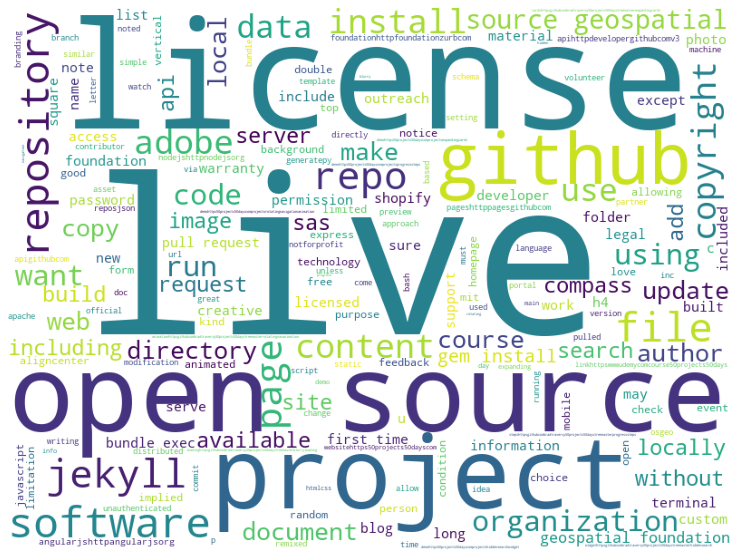

In [317]:
img = WordCloud(background_color='white', width=800, height=600).generate(css_words_l)
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

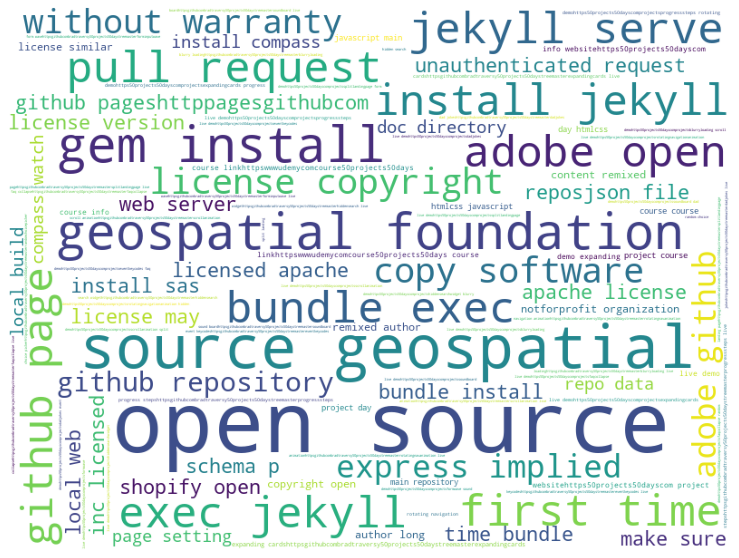

In [359]:
img = WordCloud(background_color='white', width=800, height=600, collocation_threshold=3).generate(css_words_l)
plt.imshow(img)
plt.axis('off')

In [360]:
css_bigrams_l = (pd.Series((nltk.bigrams(css_words_l.split()))).astype('string'))
css_bigrams_l.value_counts()

('open', 'source')              14
('source', 'geospatial')         6
('geospatial', 'foundation')     4
('gem', 'install')               4
('exec', 'jekyll')               3
                                ..
('volunteer', 'behalf')          1
('behalf', 'organization')       1
('organization', 'donated')      1
('donated', 'via')               1
('need', 'install')              1
Length: 1239, dtype: Int64